In [4]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import random

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
file_path = 'C:\\Users\\Dell\\Downloads\\Garstec_AS09_chiara.hdf5'

In [ ]:
# Inputs:

age_data_list = []
mass_data_list = []
FeHini_data_list = []
alphaMLT_data_list = []
yini_data_list = []
eta_data_list = []
alphaFe_data_list = []

# Outputs:

Teff_data_list = []
LPhot_data_list = []
FeH_data_list = []
Nu_data_list = []
massfin_data_list = []
numax_data_list = []
MeH_data_list = []



with h5py.File(file_path, 'r') as f:
    grid = f['grid']
    tracks = grid['tracks']
    
    selected_tracks = []
    
    
    for track_name in tracks:
        track = tracks[track_name]
        

        # Check if 'massini' dataset exists and is not empty
        if 'massini' in track and track['massini'].size > 0:
            massini_value = track['massini'][()][0]  # Get the first element if it exists
        else:
            massini_value = 0  # Put outside of our desired range so it isn't selected

        # Check if 'alphaMLT' dataset exists and is not empty
        if 'alphaFe' in track and track['alphaFe'].size > 0:
            alphaFe_value = track['alphaFe'][()][0]  # Get the first element if it exists
        else:
            alphaFe_value = 0  # Put outside of our desired range so it isn't selected

        if 'age' in track and track['age'].size > 0:
            age_value = track['age'][()][0]  # Get the first element if it exists
        else:
            age_value = 0  # Put outside of our desired range so it isn't selected

        if 'yini' in track and track['yini'].size > 0:
            yini_value = track['yini'][()][0]  # Get the first element if it exists
        else:
            yini_value = 0  # Put outside of our desired range so it isn't selected

        if 'eta' in track and track['eta'].size > 0:
            eta_value = track['eta'][()][0]  # Get the first element if it exists
        else:
            eta_value = 0  # Put outside of our desired range so it isn't selected

        if 'alphaMLT' in track and track['alphaMLT'].size > 0:
            mlt_value = track['alphaMLT'][()][0]  # Get the first element if it exists
        else:
            mlt_value = 0  # Put outside of our desired range so it isn't selected


        if 0.8 < massini_value < 0.9 and 0.1 < alphaFe_value < 0.3 and 8000 < age_value < 12500 and  0.26 < yini_value < 0.3 and 0.0 < eta_value < 0.15 and 1.55 < mlt_value < 2.1:
            selected_tracks.append(track)
            print(track_name)
            
            # Access and collect the data for each track:

            # Inputs:

            epsilon = 1e-10  # Small constant to handle zero values
            age_data = np.sign(track['age'][:]) * np.log(np.abs(track['age'][:]) + epsilon)
            mass_data = np.sign(track['massini'][:]) * np.log(np.abs(track['massini'][:]) + epsilon)
            FeHini_data = np.sign(track['FeHini'][:]) * np.log(np.abs(track['FeHini'][:]) + epsilon)
            alphaMLT_data = np.sign(track['alphaMLT'][:]) * np.log(np.abs(track['alphaMLT'][:]) + epsilon)
            yini_data = np.sign(track['yini'][:]) * np.log(np.abs(track['yini'][:]) + epsilon)
            eta_data = np.sign(track['eta'][:]) * np.log(np.abs(track['eta'][:]) + epsilon)
            alphaFe_data = np.sign(track['alphaFe'][:]) * np.log(np.abs(track['alphaFe'][:]) + epsilon)
            # Outputs:

            teff_data = track['Teff'][:]
            luminosity_data = track['LPhot'][:]
            FeH_data = track['FeH'][:]
            Nu_data = track['dnufit'][:]
            massfin_data = track['massfin'][:]
            numax_data = track['numax'][:]
            MeH_data = track['MeH'][:]

            
            # Append to lists:

            # Inputs:

            age_data_list.append(age_data)
            mass_data_list.append(mass_data)
            FeHini_data_list.append(FeHini_data)
            alphaMLT_data_list.append(alphaMLT_data)
            yini_data_list.append(yini_data)
            eta_data_list.append(eta_data)
            alphaFe_data_list.append(alphaFe_data)

            # Outputs: 

            Teff_data_list.append(teff_data)
            LPhot_data_list.append(luminosity_data)
            FeH_data_list.append(FeH_data)
            Nu_data_list.append(Nu_data)
            massfin_data_list.append(massfin_data)
            numax_data_list.append(numax_data)
            MeH_data_list.append(MeH_data)

            

print(f"Total selected tracks: {len(selected_tracks)}")

track01239
track01336
track04056
track05064
track05847
track06168
track09368
Total selected tracks: 7


In [20]:
Teff_data_list = np.log10(Teff_data_list)
LPhot_data_list = np.log10(LPhot_data_list)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (7,) + inhomogeneous part.

<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Dell\AppData\Local\Temp\ipykernel_9136\278271882.py:15: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel("Log Luminosity ($log(L_\odot$))")


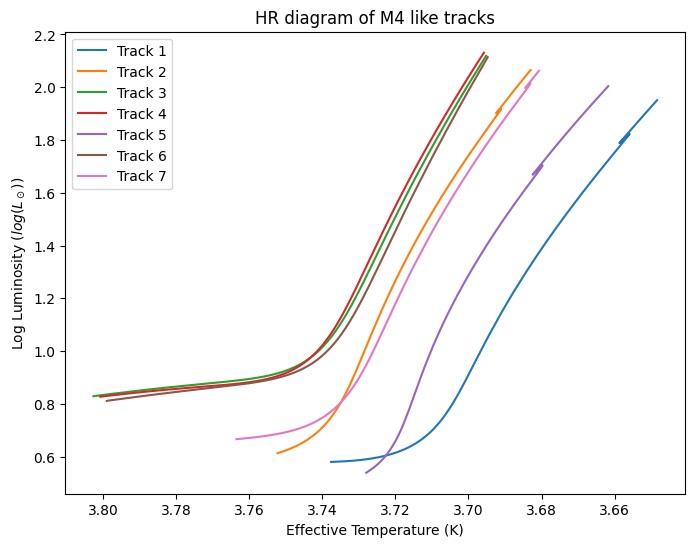

In [23]:
import matplotlib.pyplot as plt

# Create a single figure
plt.figure(figsize=(8, 6))

# Loop through the selected tracks and plot each pair of Teff and LPhot
for i in range(len(selected_tracks)):
    plt.plot(np.log10(Teff_data_list[i]), np.log10(LPhot_data_list[i]), label=f"Track {i+1}")

# Invert x-axis as per your original code
plt.gca().invert_xaxis()

# Add labels and title
plt.xlabel("Effective Temperature (K)")
plt.ylabel("Log Luminosity ($log(L_\odot$))")
plt.title("HR diagram of M4 like tracks")

# Add legend to differentiate tracks
plt.legend()

# Show the plot
plt.show()
